In [1]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import leidenalg 
import igraph as ig
import random
import copy
import networkx as nx

In [2]:
G_LS174T = ig.Graph.Read_Edgelist('../data/Edgelist/LS174T_clean_EdgesList.txt', directed=True)

In [3]:
part = leidenalg.find_partition(G_LS174T, leidenalg.ModularityVertexPartition)

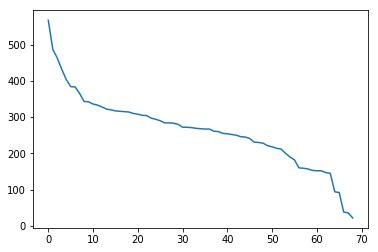

In [4]:
lens = [len(comm) for comm in part]
pd.Series(lens).plot()

In [4]:
nidx2clust = [0]*18093
for i,x in enumerate(part):
    for y in x:
        nidx2clust[y] = i

In [7]:
G_Mes = ig.Graph.Read_Edgelist('../data/Edgelist/Mesentery_clean_EdgeList.txt', directed=True)
part_mes = leidenalg.find_partition(G_Mes, leidenalg.ModularityVertexPartition)

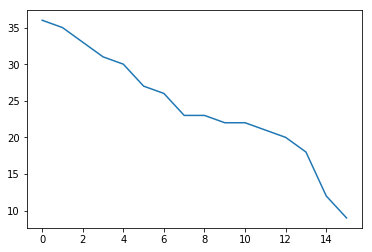

In [8]:
lens = [len(comm) for comm in part_mes]
pd.Series(lens).plot()

In [9]:
nidx2clust_mes = [0]*388
for i,x in enumerate(part_mes):
    for y in x:
        nidx2clust_mes[y] = i

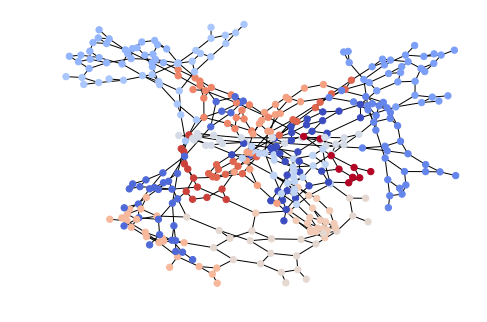

In [15]:
G_Mes_nx = nx.read_edgelist("../data/Edgelist/Mesentery_clean_EdgeList.txt", nodetype=int)
nx.draw(G_Mes_nx, node_color=nidx2clust_mes, node_size=40, cmap=plt.cm.coolwarm)

In [5]:
G_nx = nx.read_edgelist("../data/Edgelist/LS174T_clean_EdgesList.txt", nodetype=int)

In [11]:
nodes = G_nx.nodes()
nodes_subgraph = copy.deepcopy(nodes)
nodes_subgraph = random.sample(nodes_subgraph, 1000)
nidx2clust_subgraph = copy.deepcopy(nidx2clust)
for node in nodes:
    nidx2clust_subgraph[node] = -1
nidx2clust_subgraph = [nidx for nidx in nidx2clust_subgraph if nidx != -1]
subgraph = G_nx.subgraph(nodes)

In [ ]:
spring_pos = nx.spring_layout(G_nx)
nx.draw_networkx(G_nx, node_color=nidx2clust, node_size=40, pos=spring_pos, cmap=plt.cm.jet, with_labels=False)
plt.gcf().set_figheight(10)
plt.gcf().set_figwidth(20)

In [ ]:
plt.savefig('community_LS174T.pdf')

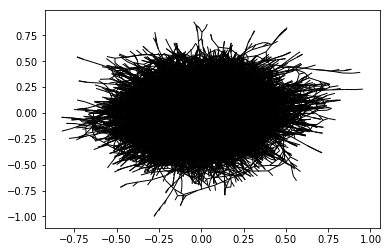

In [12]:
nx.draw_networkx(subgraph, node_color=nidx2clust_subgraph, node_size=40, cmap=plt.cm.jet, with_labels=False)